In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

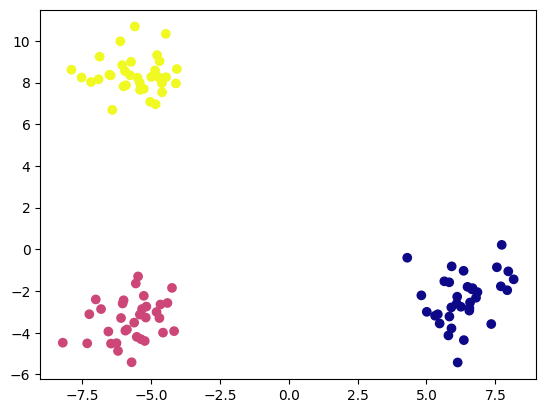

In [ ]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

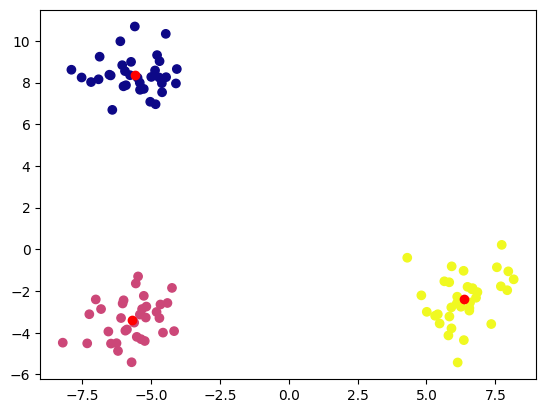

In [ ]:
predictions = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=predictions, cmap='plasma')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

In [ ]:
model.inertia_

190.69821047301448

In [ ]:
model.score

<bound method _BaseKMeans.score of KMeans(n_clusters=3)>

Optimal number of clusters

In [ ]:
from tqdm import tqdm

In [ ]:
inertia = []
k_range = range(1, 20)

for k in tqdm(k_range):
  model = KMeans(n_clusters=k).fit(X)
  inertia.append(model.inertia_)

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  5%|▌         | 1/19 [00:00<00:02,  6.35it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 2/19 [00:00<00:02,  5.69it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 16%|█▌        | 3/19 [00:00<00:03,  5.30it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

Text(0, 0.5, 'Inertia')

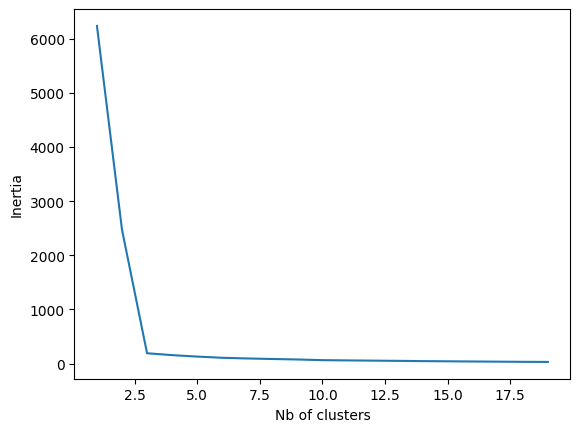

In [ ]:
plt.plot(k_range, inertia)
plt.xlabel('Nb of clusters')
plt.ylabel('Inertia')

Anomaly detection using isolation forest model

In [ ]:
import numpy as np

In [ ]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=1)
X[-1,:] = np.array([2.25, 5])

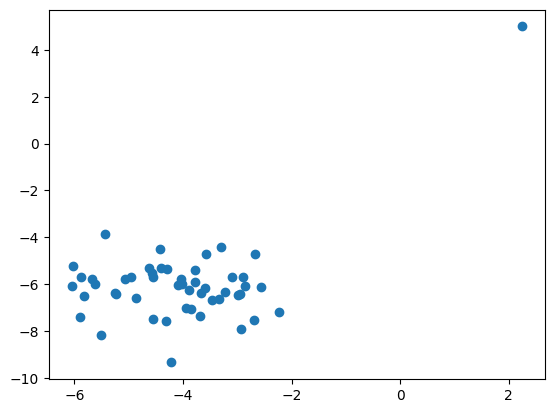

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(contamination=0.01)

In [ ]:
model.fit(X)

IsolationForest(contamination=0.01)

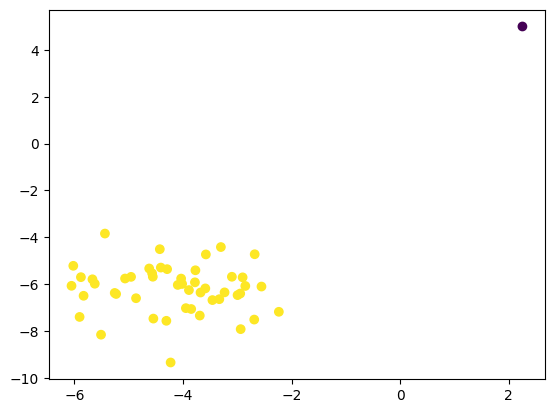

In [ ]:
predictions = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=predictions)

Application Decontamination Digits

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = digits.images

X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


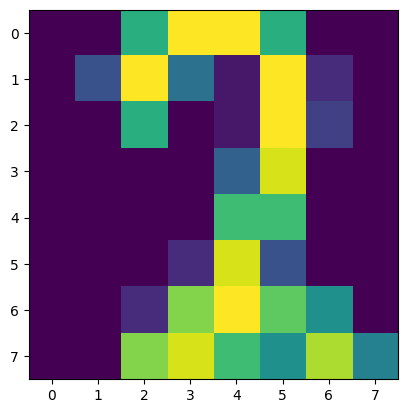

In [ ]:
plt.imshow(images[1337])

In [ ]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [ ]:
outliers = model.predict(X) == -1

In [ ]:
images[outliers].shape

(36, 8, 8)

Text(0.5, 1.0, '9')

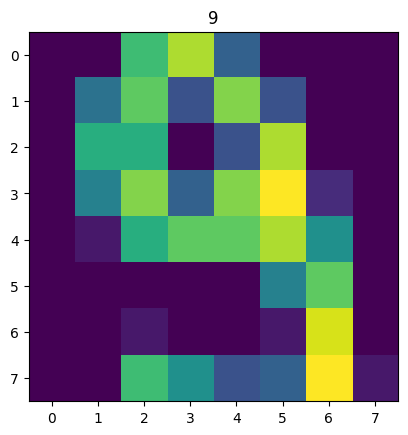

In [ ]:
plt.imshow(images[outliers][18])
plt.title(y[outliers][18])

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X.shape

(1797, 64)

In [ ]:
model = PCA(n_components=64)

X_reduced = model.fit_transform(X)

In [ ]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)

40

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='plasma')
plt.colorbar()